In [82]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [83]:
dataset=pd.read_csv('wine.data')
dataset.columns=['Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']

In [84]:
dataset.isnull().sum()

Class                           0
Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

- There are no missing values in the dataset

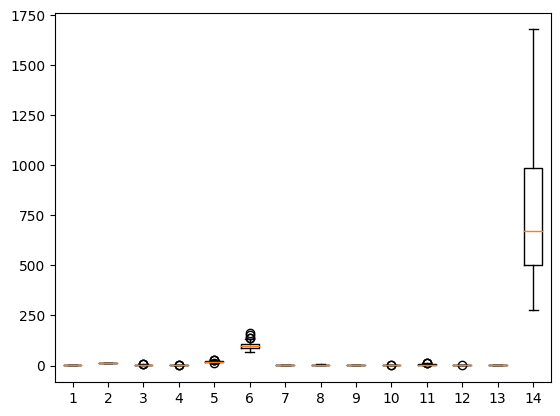

In [85]:
import matplotlib.pyplot as plt
plt.boxplot(dataset)
plt.show()

- There are not much outliers in the dataset

In [86]:
X=dataset.iloc[:,1:]
y=dataset.iloc[:,0]

In [87]:
X.shape

(177, 13)

In [88]:
from sklearn.preprocessing import StandardScaler

In [89]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [90]:
from sklearn.decomposition import PCA

In [91]:
pca=PCA()
X_pca=pca.fit_transform(X_scaled)

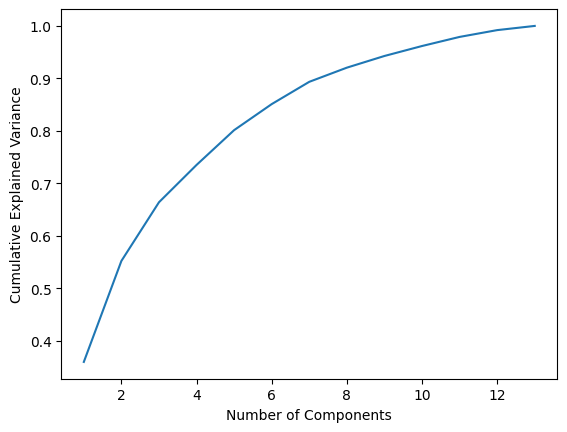

In [92]:
explained_variance = pca.explained_variance_ratio_
plt.plot(range(1, len(explained_variance)+1), explained_variance.cumsum())
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

### Based on the graph, the optimal number of features to retain is 7 as 7 features cover 90% of the variance

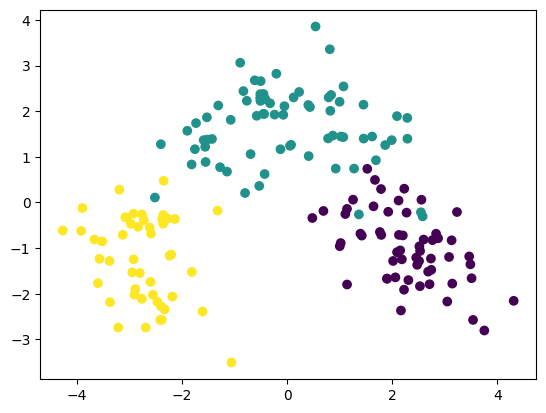

In [93]:
plt.scatter(X_pca[:,0],X_pca[:,1],c=y) # Visualization using actual labels

In [94]:
from sklearn.cluster import KMeans

In [95]:
from kneed import KneeLocator

In [96]:
wcss=[]
for k in range(1,11):
    kmeans1=KMeans(n_clusters=k,init='k-means++')
    kmeans1.fit(X_scaled)
    wcss.append(kmeans1.inertia_)

In [97]:
fk1=KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')

In [98]:
fk1.elbow

3

In [99]:
kmeans=KMeans(n_clusters=3)
y_label=kmeans.fit_predict(X_pca)

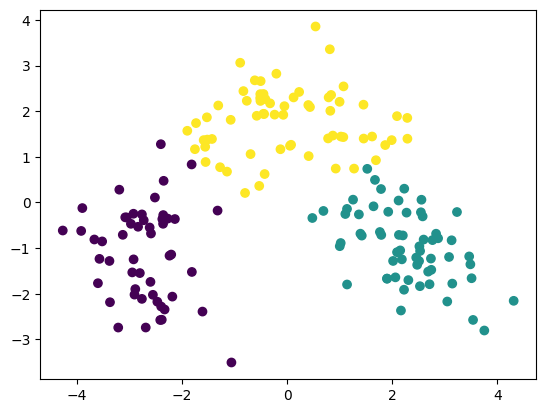

In [100]:
plt.scatter(X_pca[:,0],X_pca[:,1],c=y_label)# Visualization using predicted labels

In [101]:
from sklearn.metrics import silhouette_score

In [102]:
silhouette_score(X_scaled,kmeans.labels_)

0.2835806364948403

In [108]:
silhouette_coefficients=[]
for k in range(2,11):
    kmeans1=KMeans(n_clusters=k,init='k-means++')
    kmeans1.fit(X_scaled)
    score=silhouette_score(X_scaled,kmeans1.labels_)
    silhouette_coefficients.append(score)

In [109]:
silhouette_coefficients

[0.2673593122478238,
 0.2835806364948403,
 0.2605301778673073,
 0.23340207050662606,
 0.20087652886086005,
 0.20628846216082206,
 0.19984785144218684,
 0.13479392624341352,
 0.1462415221584404]

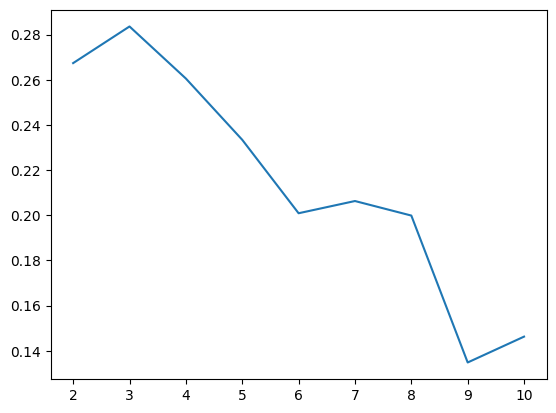

In [110]:
plt.plot(range(2,11),silhouette_coefficients)

# Report
- Based on the visualization of PCA, we have decided to retain 7 features as these 7 features cover almost 90% of the variance.
- We can observe that the maximum silhouette score is 0.28 which is not much significant. This shows that data points are somewhat close to their own cluster and somewhat far from neighbouring cluster.
- It indicates that clustering solution is not optimal for this problem statement.